## ARCH-GARCH Model

In [1]:
#Standard imports
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
from statsmodels import *
import statistics as stat
from scipy.stats import *


# Data upload Import
import yfinance as yf

#Model Imports
from sklearn.metrics import accuracy_score
from arch import arch_model
from statsmodels.tsa.stattools import q_stat
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.api as smi
import seaborn as sns
import requests
from io import BytesIO

In [2]:
# Importing Dataset
#bco = yf.download('BZ=F', start='2007-08-16',end = "2022-04-26",period='1d') # Only trading days
bco = pd.read_csv('C:/ZHAW VORLESUNGEN/PA-BA/BA/Brent_Crude_Oil')
#Calculating Log_returns
Log_Retrun = np.log(1 + bco['Close'].pct_change()).dropna()
close = bco["Close"]
bco["Log_Retrun"] = Log_Retrun
# Displaying first 5 rows of "data" DataFrame
bco.head(10000)

,Date,Close,Log_Returns,Pred_Signal,RSI,K_percent,MACD,ROC,Log_Retrun
0,2007-08-16,69.769997,-0.026449,1,29.797228,9.756045,-0.572856,-0.066622,NaN
1,2007-08-17,70.440002,0.009557,0,37.710864,17.926851,-0.563372,-0.010257,0.009557
2,2007-08-20,69.849998,-0.008411,0,33.868557,11.206854,-0.584877,-0.027159,-0.008411
3,2007-08-21,68.690002,-0.016746,1,27.466358,6.351211,-0.665806,-0.032399,-0.016746
4,2007-08-22,68.699997,0.000145,1,27.604705,6.649574,-0.718980,-0.021507,0.000145
...,...,...,...,...,...,...,...,...,...
3636,2022-04-20,106.800003,-0.004205,1,49.397702,53.372104,0.168811,0.056693,-0.004205
3637,2022-04-21,108.330002,0.014224,0,52.951881,62.267448,0.216530,0.077053,0.014224
3638,2022-04-22,106.650002,-0.015630,0,48.681002,52.500002,0.117432,0.037653,-0.015630
3639,2022-04-25,102.320000,-0.041447,1,39.143934,27.325569,-0.306961,0.038993,-0.041447


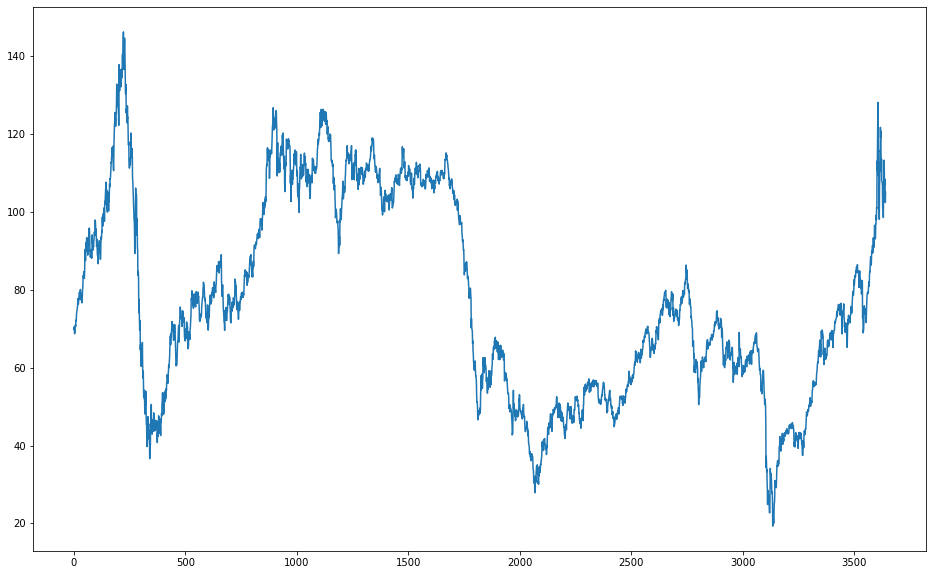

In [3]:
plt.figure(figsize=(16,10))
plt.plot(bco["Close"])

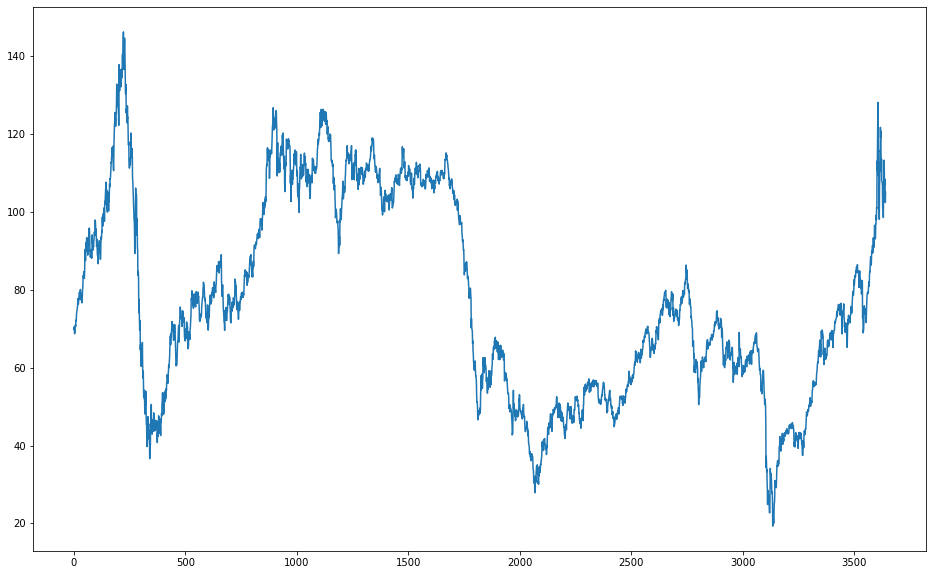

In [4]:
clos = np.array(bco["Close"])
plt.figure(figsize=(16,10))
plt.plot(clos)

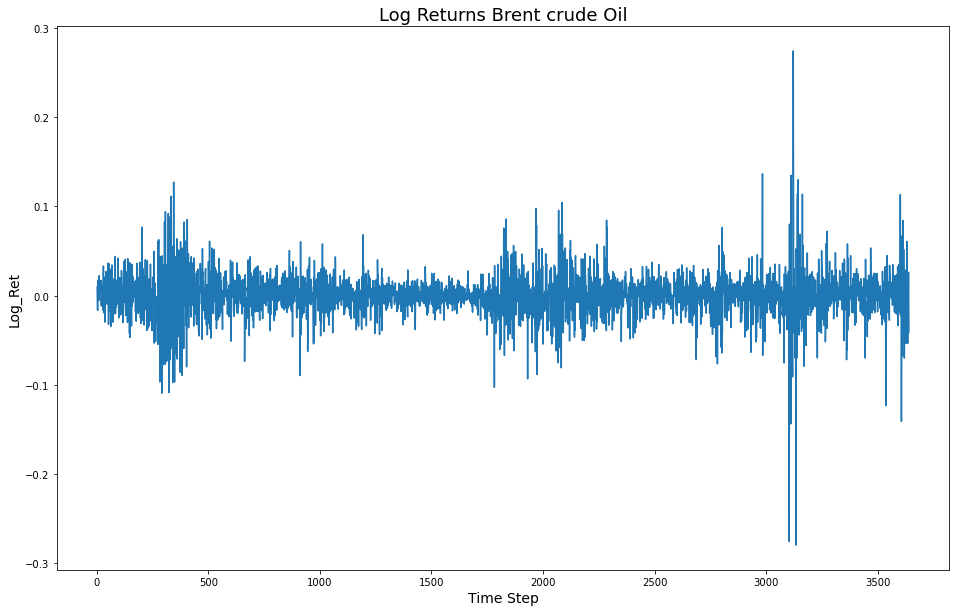

In [5]:
#Plotting Logreturns
plt.figure(figsize=(16,10))
plt.title('Log Returns Brent crude Oil', fontsize=18)
plt.ylabel('Log_Ret', fontsize=14)
plt.xlabel('Time Step', fontsize=14)
plt.plot(Log_Retrun)

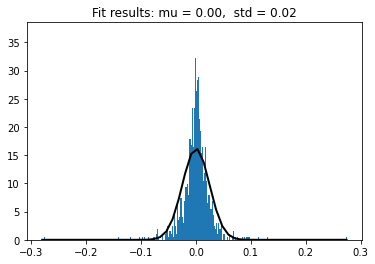

In [6]:
#Lets check the distribution of the data
import scipy
# Generate some data for this demonstration.
data = Log_Retrun

# Fit a normal distribution to the data:
mu, std = scipy.stats.norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=1000, density=True)

# Plot the PDF.
xmin, xmax = np.min(data), np.max(data)
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

# Descriptive Statistics

In [7]:
def descriptive_statistic(original_data):
    import scipy.stats as ss
    from scipy.stats import skew, kurtosis, jarque_bera
    import numpy as np
    #Original Data
    mean = np.mean(original_data)
    median = np.median(original_data)
    maximum = np.max(original_data)
    minimum = np.min(original_data)
    sd = np.std(original_data)
    skewness = ss.skew(original_data)
    kurtosis = ss.kurtosis(original_data)
    jarqu_bera = ss.jarque_bera(original_data)
    Observations = len(original_data)
    print("Original Data:\n","Mean: ",round(mean,3), "\n", "Median: ", round(median,3), "\n", "Maximum: ", round(maximum,3), "\n", "Minimum: ", round(minimum,3), 
             "\n", "Standard deviation: ", round(sd,3), "\n", "Skewness: ", round(skewness,3), "\n", "Kurtosis: ", round(kurtosis,3), "\n"
             "Jarque-Bera: ", jarqu_bera, "\n", "Observations: ", round(Observations,3))
    

In [8]:
descriptive_statistic(bco["Close"])

Original Data:
 Mean:  77.408 
 Median:  73.36 
 Maximum:  146.08 
 Minimum:  19.33 
 Standard deviation:  25.915 
 Skewness:  0.226 
 Kurtosis:  -1.037 
Jarque-Bera:  Jarque_beraResult(statistic=194.05488357708592, pvalue=0.0) 
 Observations:  3641


C:\Users\Danijel\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


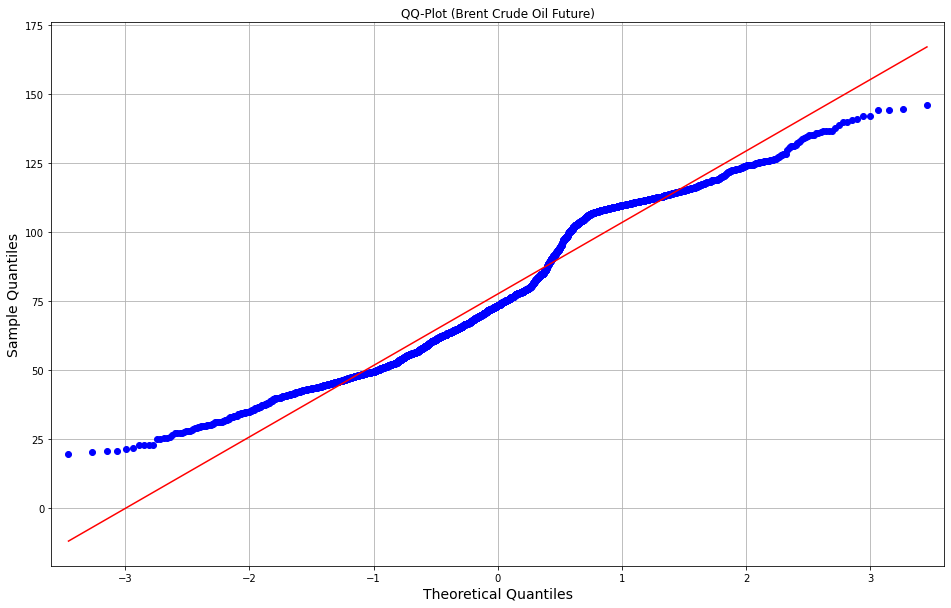

In [9]:
#QQ Plot of original Data
data =  bco["Close"]

N, M = 16, 10
fig, ax = plt.subplots(figsize=(N, M))
sm.qqplot(data, line='s',ax=ax)
plt.title('QQ-Plot (Brent Crude Oil Future)')
plt.grid(True)
plt.ylabel('Sample Quantiles', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.show()

C:\Users\Danijel\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 1296x720 with 0 Axes>

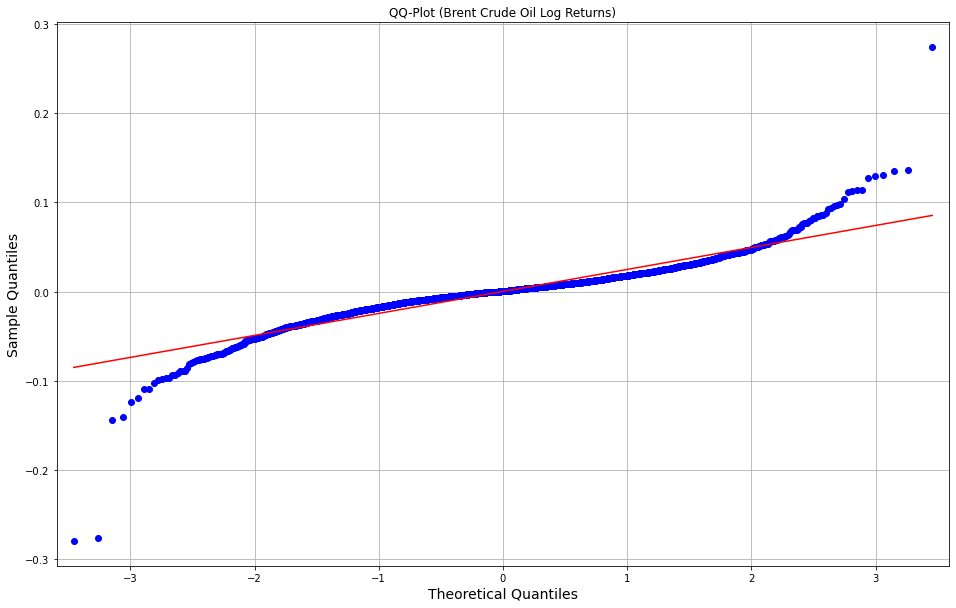

In [10]:
#QQ Plot of Log Returns Data
plt.figure(figsize=(18,10))
data =  np.squeeze(Log_Retrun)

N, M = 16, 10
fig, ax = plt.subplots(figsize=(N, M))
sm.qqplot(data, line='s',ax=ax)
plt.title('QQ-Plot (Brent Crude Oil Log Returns)')
plt.grid(True)
plt.ylabel('Sample Quantiles', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.show()
plt.show()

C:\Users\Danijel\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


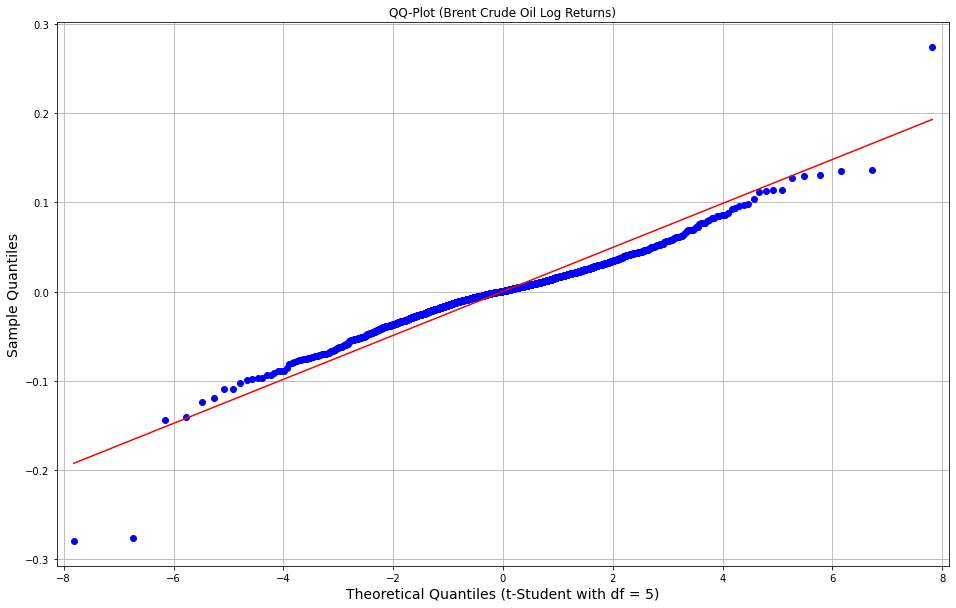

In [11]:
# QQ-Plot with T-Student Distribution
#Lets check the distribution of the data
import statsmodels.api as sm
import scipy.stats as stats
data =   np.squeeze(Log_Retrun)

N, M = 16, 10
fig, ax = plt.subplots(figsize=(N, M))
sm.qqplot(data, dist = stats.t, distargs=(5,), line='s',ax=ax)# Seems like a t-Student Distribution with df = 5
plt.title('QQ-Plot (Brent Crude Oil Log Returns)')
plt.grid(True)
plt.ylabel('Sample Quantiles', fontsize=14)
plt.xlabel('Theoretical Quantiles (t-Student with df = 5)', fontsize=14)
plt.show()


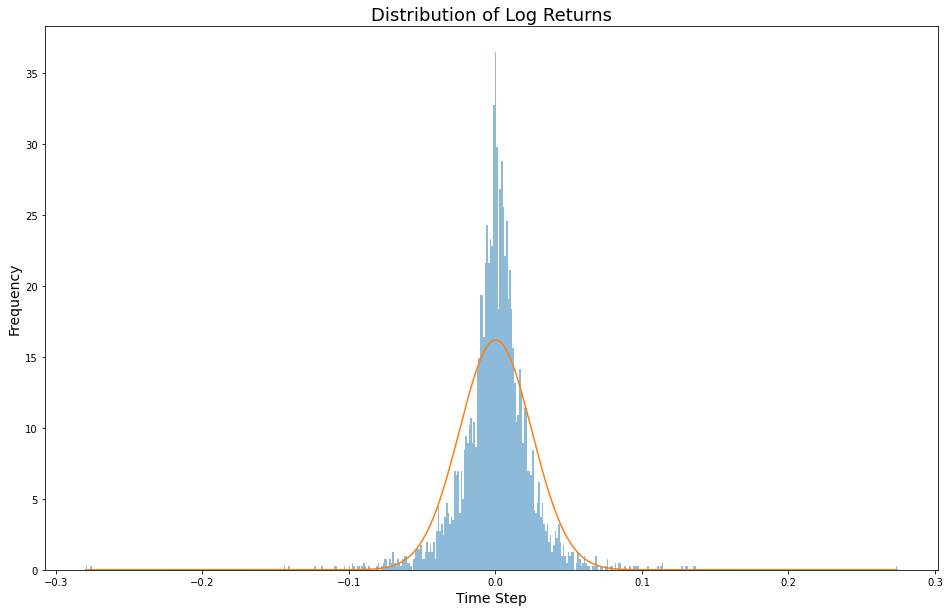

In [12]:
dat = bco["Log_Retrun"].dropna()
import scipy.stats as ss
plt.figure(figsize=(16,10))
plt.title("Distribution of Log Returns", fontsize=18)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Time Step', fontsize=14)
_, bins, _ = plt.hist(dat, 500, density=1, alpha=0.5)

mu, sigma = ss.norm.fit(dat)

best_fit_line = ss.norm.pdf(bins, mu, sigma)

plt.plot(bins, best_fit_line)

# Traind and Test Data

In [13]:
Log_Retrun = np.array(Log_Retrun)
Log_Retrun = pd.DataFrame(Log_Retrun)


In [14]:
n = round(0.2 * len(Log_Retrun))
split_index = len(Log_Retrun) - n
train_df = Log_Retrun.iloc[:split_index]
test_df = Log_Retrun.iloc[split_index:]

print("Training Set Shape - ", train_df.shape)
print("Testing Set Shape - ", test_df.shape)

Training Set Shape -  (2912, 1)
Testing Set Shape -  (728, 1)


[]

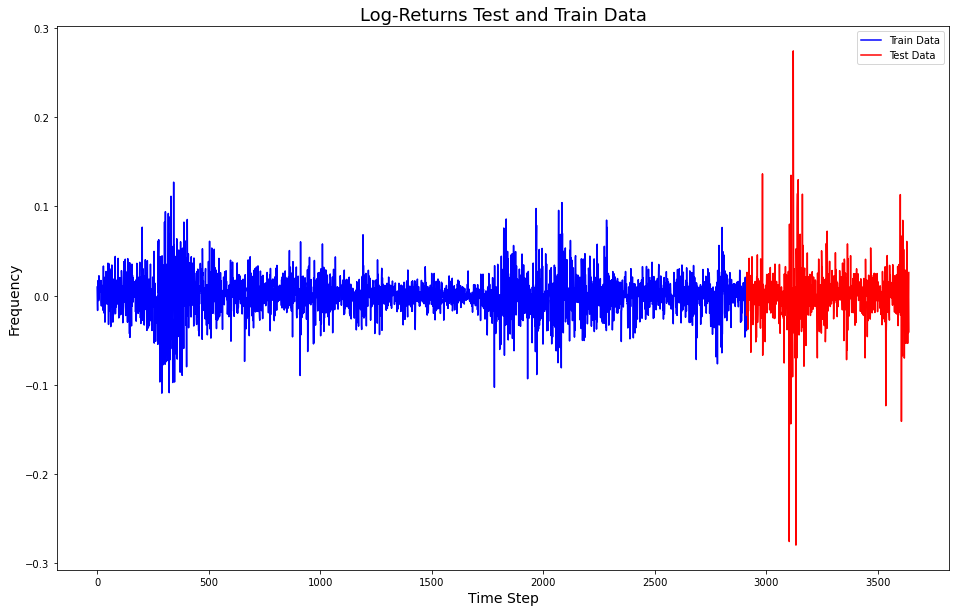

In [15]:
#Plotting TRain and Test Data

plt.figure(figsize=(16,10))
plt.title("Log-Returns Test and Train Data", fontsize=18)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Time Step', fontsize=14)


# Plotting the Actual CB Returns
plt.plot(train_df, color = "blue", label = "Train Data")

# Plot the Forecasted Returns from ARMA(1, 1) 

plt.plot(test_df, color = "red", label = "Test Data")
plt.legend()
plt.plot()

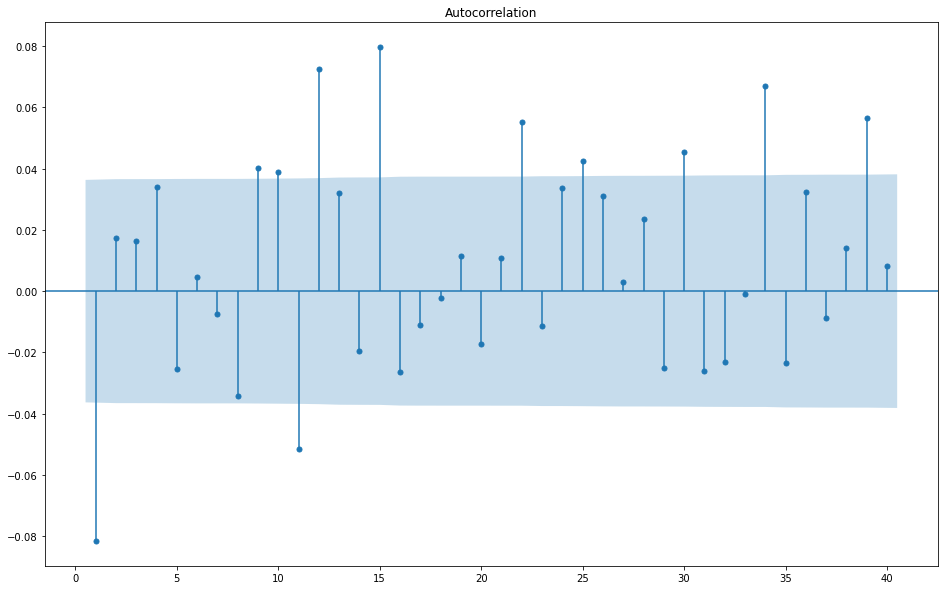

In [16]:
# Plot autocorrelation
#MA
N, M = 16, 10
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(train_df, lags=40, zero = False,ax=ax);
plt.show()


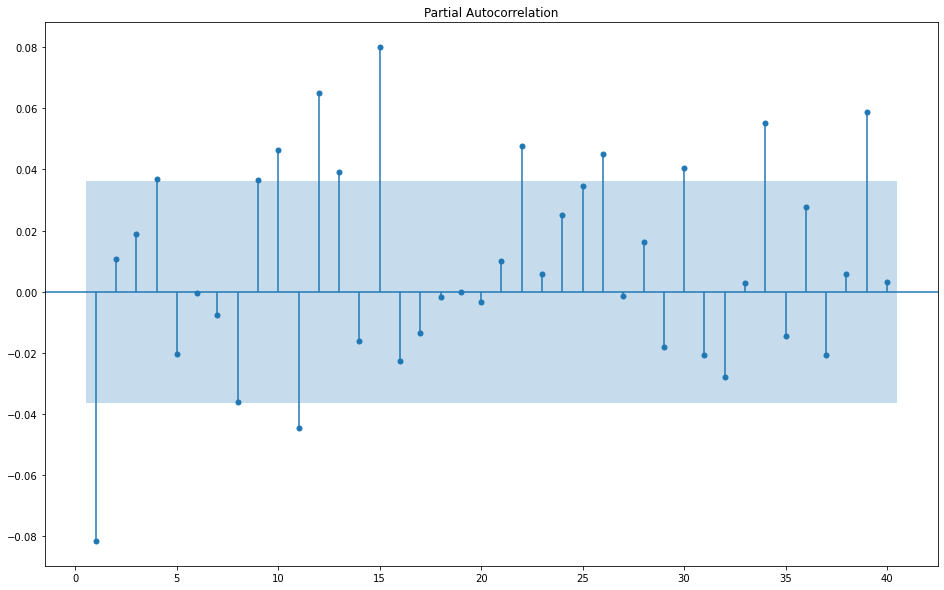

In [17]:
# Plot partial autocorrelation
#AR
N, M = 16, 10
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(train_df, lags=40, zero = False,ax=ax);

# Stationarty test With ADF

In [18]:
#Checking if time seires is stationary

from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [19]:
check_stationarity(train_df)

ADF Statistic: -11.823858
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


In [20]:
#CHeking Standardized Resiudals

from arch.__future__ import reindexing

garch_model_lagg = arch_model(100*train_df, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'studentst')

gm_result_lagg = garch_model_lagg.fit(disp='off')
print(gm_result_lagg.params)
print("\n")
print(gm_result_lagg.summary)
print('\n')

gm_forecast = gm_result_lagg.forecast(horizon = 5)
#print(gm_forecast.variance[-1:])

mu          0.041775
omega       0.020197
alpha[1]    0.063743
beta[1]     0.935284
nu          5.929174
Name: params, dtype: float64


<bound method ARCHModelResult.summary of                         Constant Mean - GARCH Model Results                         
Dep. Variable:                            0   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5869.28
Distribution:      Standardized Student's t   AIC:                           11748.6
Method:                  Maximum Likelihood   BIC:                           11778.4
                                              No. Observations:                 2912
Date:                      Thu, Jun 02 2022   Df Residuals:                     2911
Time:                              12:26:24   Df Model:                            1
                                  Mean Model              

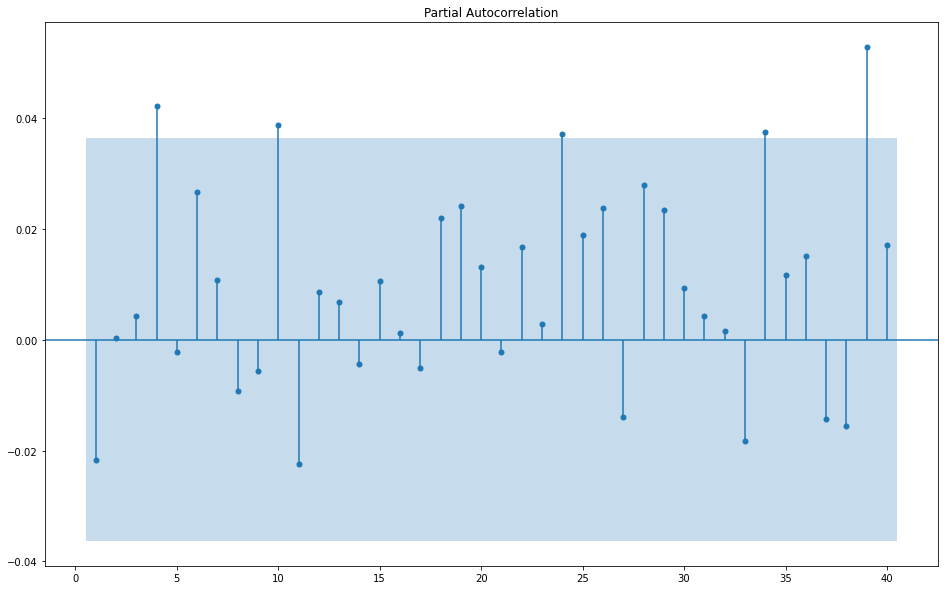

In [21]:
N, M = 16, 10
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(gm_result_lagg.std_resid, lags=40, zero = False,ax=ax);


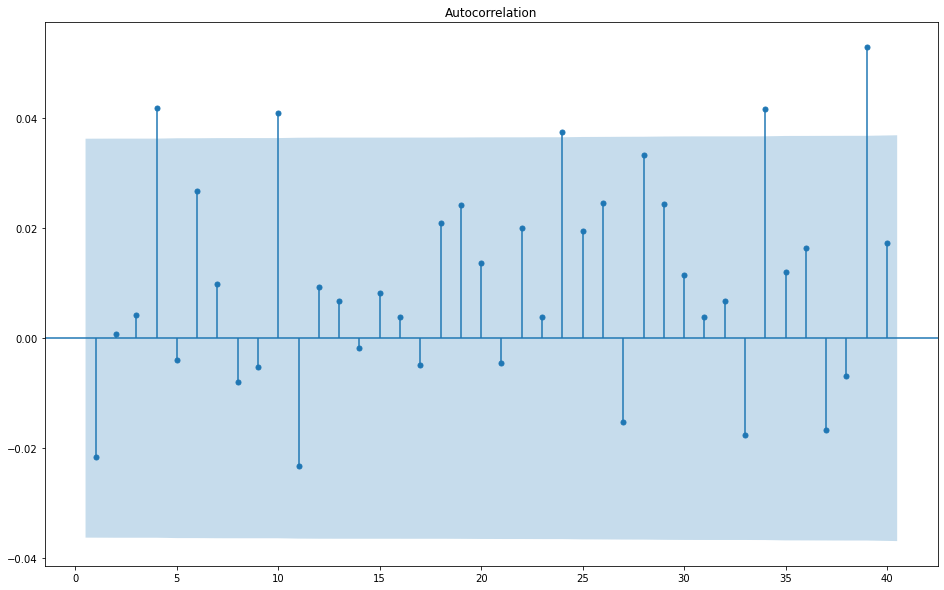

In [22]:
N, M = 16, 10
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(gm_result_lagg.std_resid, lags=40, zero = False,ax=ax);

For lag 10 is the residual out of the 0.05 level. but due to minimize the model complexety, we decided to use 5 lags. 

# Best BIC

In [23]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [24]:
#Defining the Model ARMA(1,1)
train_df_scaled = train_df * 100
arma_model_1 = arima = ARIMA(train_df_scaled, order=(1,0,1),trend = "ct")
# Fitting the Model
arma_model_1_results = arma_model_1.fit()

In [25]:
#Defining the Model ARMA(4,4)
arma_model_2 = ARIMA(train_df_scaled, order=(4,0,4),trend = "ct")
# Fitting the Model
arma_model_2_results = arma_model_2.fit()

C:\Users\Danijel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Danijel\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [26]:
#Defining the Model ARMA(4,8)
arma_model_3 = ARIMA(train_df_scaled, order=(4,0,8),trend = "ct",)
# Fitting the Model
arma_model_3_results = arma_model_3.fit()


KeyboardInterrupt



In [ ]:
#Defining the Model ARMA(10,10)
arma_model_4 = ARIMA(train_df_scaled, order=(10,0,10),trend = "ct",)
# Fitting the Model
arma_model_4_results = arma_model_4.fit()

In [ ]:
#Defining the Model p = 39
arma_model_5 = ARIMA(train_df_scaled, order=(15,0,15),trend = "ct",)
# Fitting the Model
arma_model_5_results = arma_model_5.fit()

In [ ]:
from tabulate import tabulate
#create data

BIC_1 = arma_model_1_results.bic
BIC_2 = arma_model_2_results.bic
BIC_3 = arma_model_3_results.bic
BIC_4 = arma_model_4_results.bic
BIC_5 = arma_model_5_results.bic

data = [["ARMA(1,1)", BIC_1], 
        ["ARMA(4,4)", BIC_2], 
        ["ARMA(4,8)", BIC_3],
        ["ARMA(10,10)", BIC_4],
        ["ARMA(15,15)", BIC_5]]
  
#define header names
col_names = ["Model Order", "BIC"]
  
#display table
print("ARMA Model Order")
print(tabulate(data, headers=col_names))

# Lagging DATA


In [27]:
# Lag Data
def buildLaggedFeatures(s,lag=2,dropna=True):
    
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [28]:
### TEST DATA LAG - 4 Days

res = buildLaggedFeatures(test_df,lag=1,dropna=False)
# Drop all columns with NA values
test_lag = res.dropna()

test_lag = np.array(test_lag)
test_lag = pd.DataFrame(test_lag)


# ARMA(1,1)~GARCH(1,1)

In [29]:
import pmdarima as pm
model = pm.auto_arima(Log_Retrun, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-16624.899, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-16625.172, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-16626.753, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-16626.689, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-16624.987, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-16623.000, Time=0.86 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-16624.833, Time=0.27 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 2.713 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3640
Model:               SARIMAX(1, 0, 0)   Log Likelihood                8315.377
Date:                Thu, 02 Jun 2022   AIC                         -16626.753
Time:                        12:26:39   BIC                         -16614.354
Sample:  

In [30]:
import pmdarima
import arch
from statsmodels.tsa.arima.model import ARIMA

# fit ARIMA on returns 
arima = ARIMA(train_df, order=(1,0,1),trend = "ct")
arima_model = arima.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 2912
Model:                 ARIMA(1, 0, 1)   Log Likelihood                7020.987
Date:                Thu, 02 Jun 2022   AIC                         -14031.973
Time:                        12:26:40   BIC                         -14002.090
Sample:                             0   HQIC                        -14021.208
                               - 2912                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.420      0.674      -0.001       0.002
x1         -2.174e-07   4.23e-07     -0.514      0.607   -1.05e-06    6.11e-07
ar.L1         -0.1805      0.142     -1.267      0.2

In [31]:
sm.stats.acorr_ljungbox(arima_model.resid, lags=20, return_df=True)

,lb_stat,lb_pvalue
1,0.000047,9.945438e-01
2,0.039122,9.806289e-01
3,1.480959,6.866719e-01
4,4.687488,3.208913e-01
5,6.209042,2.864064e-01
6,6.221749,3.988138e-01
7,6.508408,4.817897e-01
8,9.607536,2.936587e-01
9,14.642697,1.012297e-01
10,18.917444,4.132388e-02


In [32]:
sm.stats.acorr_ljungbox(arima_model.resid, lags=[1,10,15,20], return_df=True)

,lb_stat,lb_pvalue
1,0.000047,9.945438e-01
10,18.917444,4.132388e-02
15,61.224745,1.551223e-07
20,64.187634,1.571243e-06


In [33]:
arima_residuals = arima_model.resid

In [34]:
# fit a ARMA(1,0,1)~GARCH(1,1) model on the residuals of the ARIMA model
garch = arch.arch_model(100*arima_residuals,vol = "GARCH" ,p=1 ,q=1,mean = "Constant",dist="t")
garch_fitted = garch.fit(disp="off")
garch_fitted

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5868.30
Distribution:      Standardized Student's t   AIC:                           11746.6
Method:                  Maximum Likelihood   BIC:                           11776.5
                                              No. Observations:                 2912
Date:                      Thu, Jun 02 2022   Df Residuals:                     2911
Time:                              12:26:43   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

In [35]:
ljung = sm.stats.acorr_ljungbox(garch_fitted.resid, lags=[1,10,15,20], return_df=True,)
ljung

,lb_stat,lb_pvalue
1,0.000047,9.945438e-01
10,18.917444,4.132388e-02
15,61.224745,1.551223e-07
20,64.187634,1.571243e-06


In [36]:
conditional_volatility = garch_fitted.conditional_volatility/100 #rescale the cond vola
garch_residuals = garch_fitted.resid
arma_residuals = arima_residuals


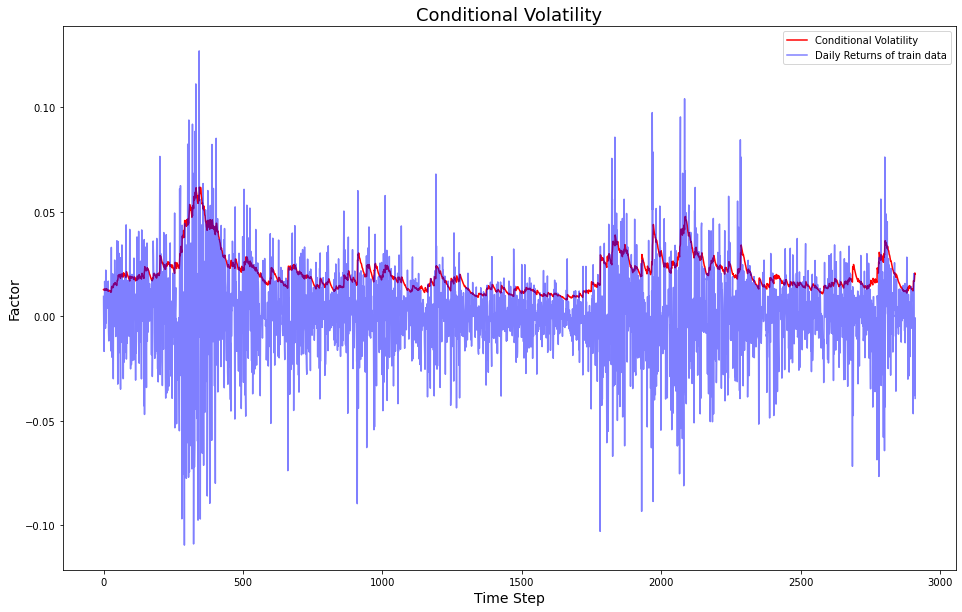

In [37]:

# Plot model fitting results
plt.figure(figsize=(16,10))
plt.title('Conditional Volatility', fontsize=18)
plt.ylabel('Factor', fontsize=14)
plt.xlabel('Time Step', fontsize=14)
plt.plot(conditional_volatility, color = 'red', label = 'Conditional Volatility')
plt.plot(train_df, color = "blue", label = 'Daily Returns of train data', alpha = 0.5)
plt.legend(loc = 'upper right')
plt.show()

In [38]:
m = (len(train_df))
n = (len(test_df))
m,n

#index cond vola: 2192 bis 2922

(2912, 728)

In [39]:
mean = np.mean(train_df)
std = np.var(train_df) 
num_samples = len(test_df)
eps_1 = np.random.normal(mean, std, size=num_samples)

In [40]:
### TEST DATA LAG - 10 Days
#index cond vola: 2192 bis 2922
cond_vola = np.array(eps_1)
cond_vola = pd.DataFrame(cond_vola)
cond_vola = np.array(cond_vola)#index of test df [2192:2922]
cond_vola = pd.DataFrame(cond_vola)


res = buildLaggedFeatures(cond_vola,lag=1,dropna=False)
# Drop all columns with NA values
cond_vola = res.dropna()

cond_vola = np.array(cond_vola)
eps_2 = pd.DataFrame(cond_vola)

In [41]:
### TEST DATA LAG - 10 Days
#index cond vola: 2192 bis 2922
cond_vola = np.array(conditional_volatility)
cond_vola =pd.DataFrame(cond_vola)
cond_vola = np.array(cond_vola[2192:2922])#index of test df
cond_vola = pd.DataFrame(cond_vola)


res = buildLaggedFeatures(cond_vola,lag=4,dropna=False)
# Drop all columns with NA values
cond_vola = res.dropna()

cond_vola = np.array(cond_vola)
eps = pd.DataFrame(cond_vola)


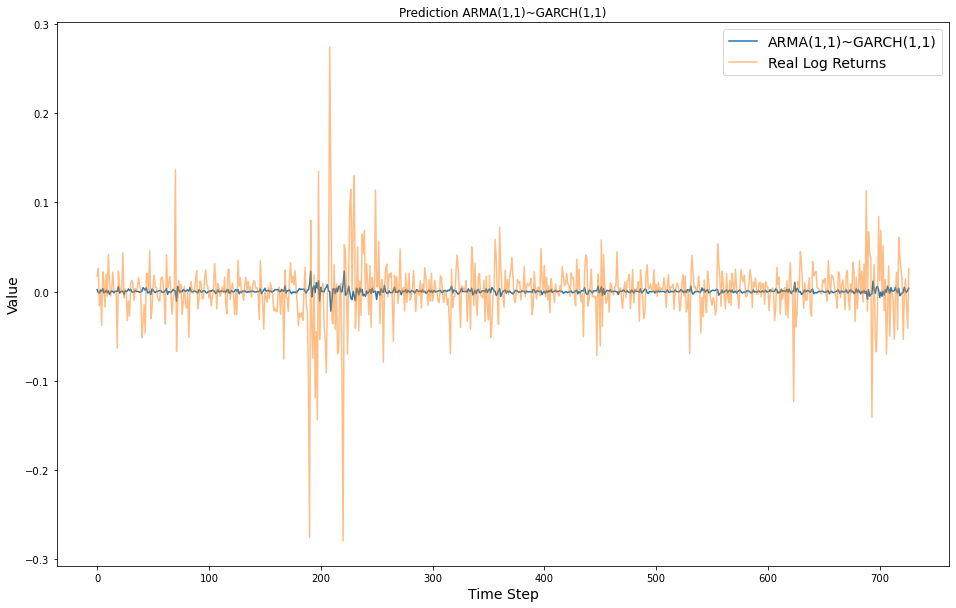

In [42]:
#ARMA(1,1)~GARCH(1,1)-pred

c,x1,ar1,ma1,sigma= arima_model.params
y_t = c + ar1 * test_lag.iloc[:,1]+ ma1 * test_lag.iloc[:,1]
plt.figure(figsize=(16,10))
plt.plot(y_t,label = 'ARMA(1,1)~GARCH(1,1)'),plt.plot(test_lag[0], alpha = 0.5,label = 'Real Log Returns')
plt.legend(loc = 'upper right')
plt.title("Prediction ARMA(1,1)~GARCH(1,1)")
plt.ylabel('Value', fontsize=14)
plt.xlabel('Time Step', fontsize=14)
plt.legend(loc='best', fontsize=14)

## Tradeing Performance

In [43]:
y_pred = np.sign(y_t)
log_ret = bco["Log_Retrun"]
n = len(y_pred)
y_pred = y_pred[:n-1]
X = log_ret.shift(-1)
X = X[len(X)-n:]
X = pd.DataFrame(X).dropna()

len(X),len(y_pred)

(726, 726)

In [44]:
# Transform -1,1 Signal in a 0,1 Signal
y_pred_1 = np.array(y_pred)
y_pred1 = []
for i in range(0,len(y_pred_1)):
    if y_pred_1[i] == -1:
        y_pred1.append(0)
    else:
        y_pred1.append(1)

y_pred1 = pd.DataFrame(y_pred1)

In [45]:
m3 = 4*5*3
real_signal = np.sign(X)
real_signal = np.array(real_signal)
y_pred_Array = np.array(y_pred)

In [46]:
print('Correct Prediction (Hit Ratio) in % : ', accuracy_score(real_signal, y_pred_Array) * 100.0) # Hit Ratio low risk strategie!
print()

Correct Prediction (Hit Ratio) in % :  54.269972451790636



In [47]:
# Transform -1,1 Signal in a 0,1 Signal
real_signal_long = np.array(real_signal)
real_signal_L = []
for i in range(0,len(real_signal_long)):
    if real_signal_long[i] == -1:
        real_signal_L.append(0)
    else:
        real_signal_L.append(1)

real_signal_L = pd.DataFrame(real_signal_L)
real_signal_L = np.array(real_signal_L)


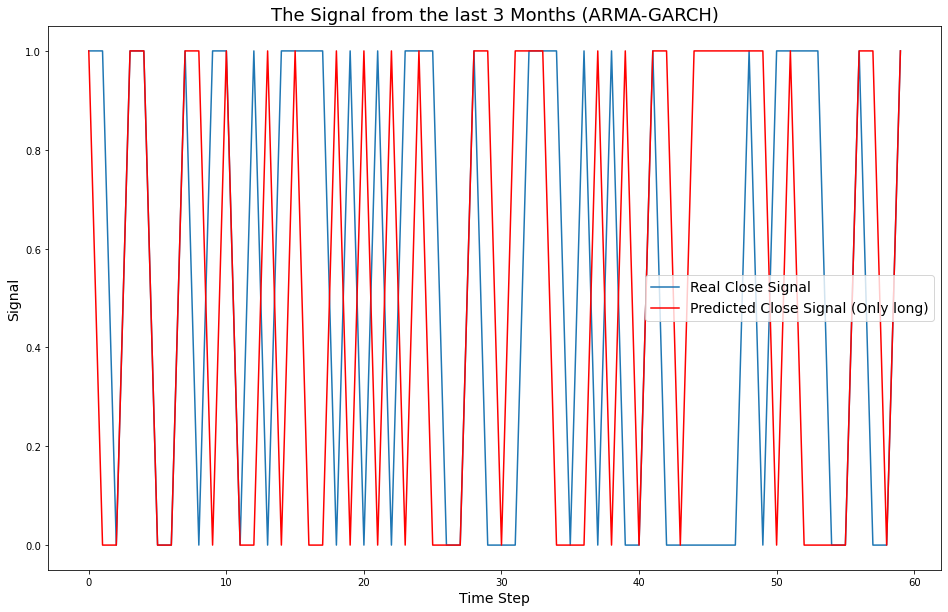

In [48]:
m3 = 4*5*3

y_pred_Array_l = np.array(y_pred1)
plt.figure(figsize=(16,10))
plt.title('The Signal from the last 3 Months (ARMA-GARCH)', fontsize=18)
plt.plot(real_signal_L[-m3:], label = 'Real Close Signal')
plt.plot(y_pred_Array_l[-m3:], color = 'red', label = 'Predicted Close Signal (Only long)')
plt.ylabel('Signal', fontsize=14)
plt.xlabel('Time Step', fontsize=14)
plt.legend(loc='best', fontsize=14)

In [49]:
time = 4*5*3 #3months
x = np.linspace(0, time,time)
y1 = bco["Close"][-time:] 
y2 = y_pred_Array[-time:]  #long-short
y3 = y_pred_Array_l[-time:]#onlylong


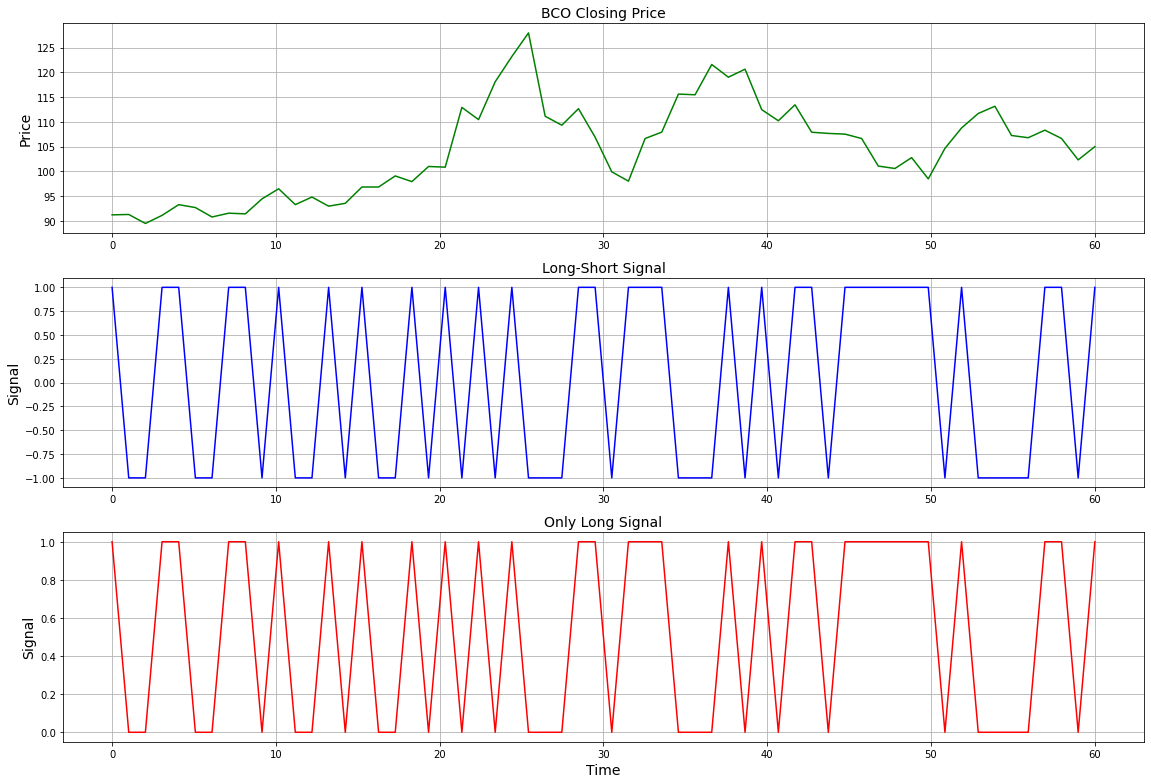

In [50]:
# Change the figure size
plt.figure(figsize=[16, 11])

# Plot the subplots
# Plot 1
plt.subplot(3, 1, 1)
plt.plot(x, y1, color='green')
plt.title('BCO Closing Price', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()

# Plot 2
plt.subplot(3, 1, 2)
plt.plot(x, y2, color='blue')
plt.title('Long-Short Signal', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.grid()

# Plot 3
plt.subplot(3, 1, 3)
plt.plot(x, y3, color='red' )
plt.title('Only Long Signal', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.grid()

plt.tight_layout()
plt.show()

In [51]:
#only long
perf = y_pred1.values * X.values
perf = pd.DataFrame(perf)
perf = perf.dropna()

trading_days_Y = 5*52

perf_sharpe = np.sqrt(trading_days_Y) * np.mean(perf) / (np.sqrt(np.var(perf)))


In [52]:
#long short
y_pred = pd.DataFrame(y_pred)
perf1 = y_pred.values * X.values
perf1 = pd.DataFrame(perf1)
perf1 = perf1.dropna()

trading_days_Y = 5*52

perf_sharpe1 = np.sqrt(trading_days_Y) * np.mean(perf1) / (np.sqrt(np.var(perf1)))

In [53]:
#Buy and hold
perf2 = np.array(X)

trading_days_Y = 5*52

perf_sharpe2 = np.sqrt(trading_days_Y) * np.mean(perf2) / (np.sqrt(np.var(perf2)))


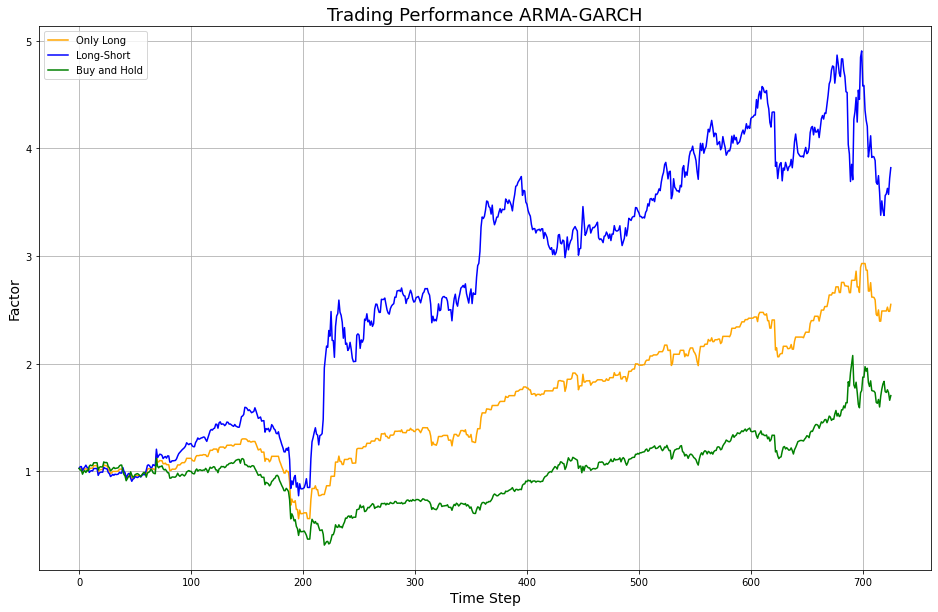

In [54]:
plt.figure(figsize=(16,10))
plt.title('Trading Performance ARMA-GARCH', fontsize=18)
plt.ylabel('Factor', fontsize=14)
plt.xlabel('Time Step', fontsize=14)
plt.grid(True)
plt.plot(np.exp(perf).cumprod() , label='Only Long', color = 'orange')
plt.plot(np.exp(perf1).cumprod() , label='Long-Short', color = 'blue')
plt.plot(np.exp(perf2).cumprod() , label='Buy and Hold', color = 'green')
plt.legend(loc='best')
plt.show()

In [55]:
from tabulate import tabulate
#create data
perf2 = pd.DataFrame(perf2)
perf_0 = np.exp(perf).cumprod().iloc[-1]
perf_1 = np.exp(perf1).cumprod().iloc[-1]
perf_2 = np.exp(perf2).cumprod().iloc[-1]


data = [["Buy and Hold", round(perf_sharpe2,2),round(perf_2,2)], 
        ["Only Long", round(perf_sharpe,2),round(perf_0,2)], 
        ["Long Short", round(perf_sharpe1,2),round(perf_1,2)]]
  
#define header names
col_names = ["Strategie", "Sharp Ratio", "Profit Factor"]
  
#display table
print("ARMA-GARCH")
print(tabulate(data, headers=col_names))

ARMA-GARCH
Strategie       Sharp Ratio    Profit Factor
------------  -------------  ---------------
Buy and Hold           0.35             1.7
Only Long              0.77             2.55
Long Short             0.88             3.82


In [56]:
only_long = np.exp(perf).cumprod()
long_short = np.exp(perf1).cumprod()
log_ret = np.array(Log_Retrun[2192:2922])
logret = pd.DataFrame(log_ret)

performance_arma_garch = pd.concat([only_long, long_short], axis=1)
performance_arma_garch.columns  = ["only_long","long_short"]

In [57]:
#performance_arma_garch.to_csv('/Users/romaindeleze/Desktop/BSc/Romain_WI_TZ/8.Semester/BA/Daten/arma_garch_Perf_data')

# Analysis of Performance Plot

In [58]:
y4 = pd.DataFrame(np.exp(perf2).cumprod())


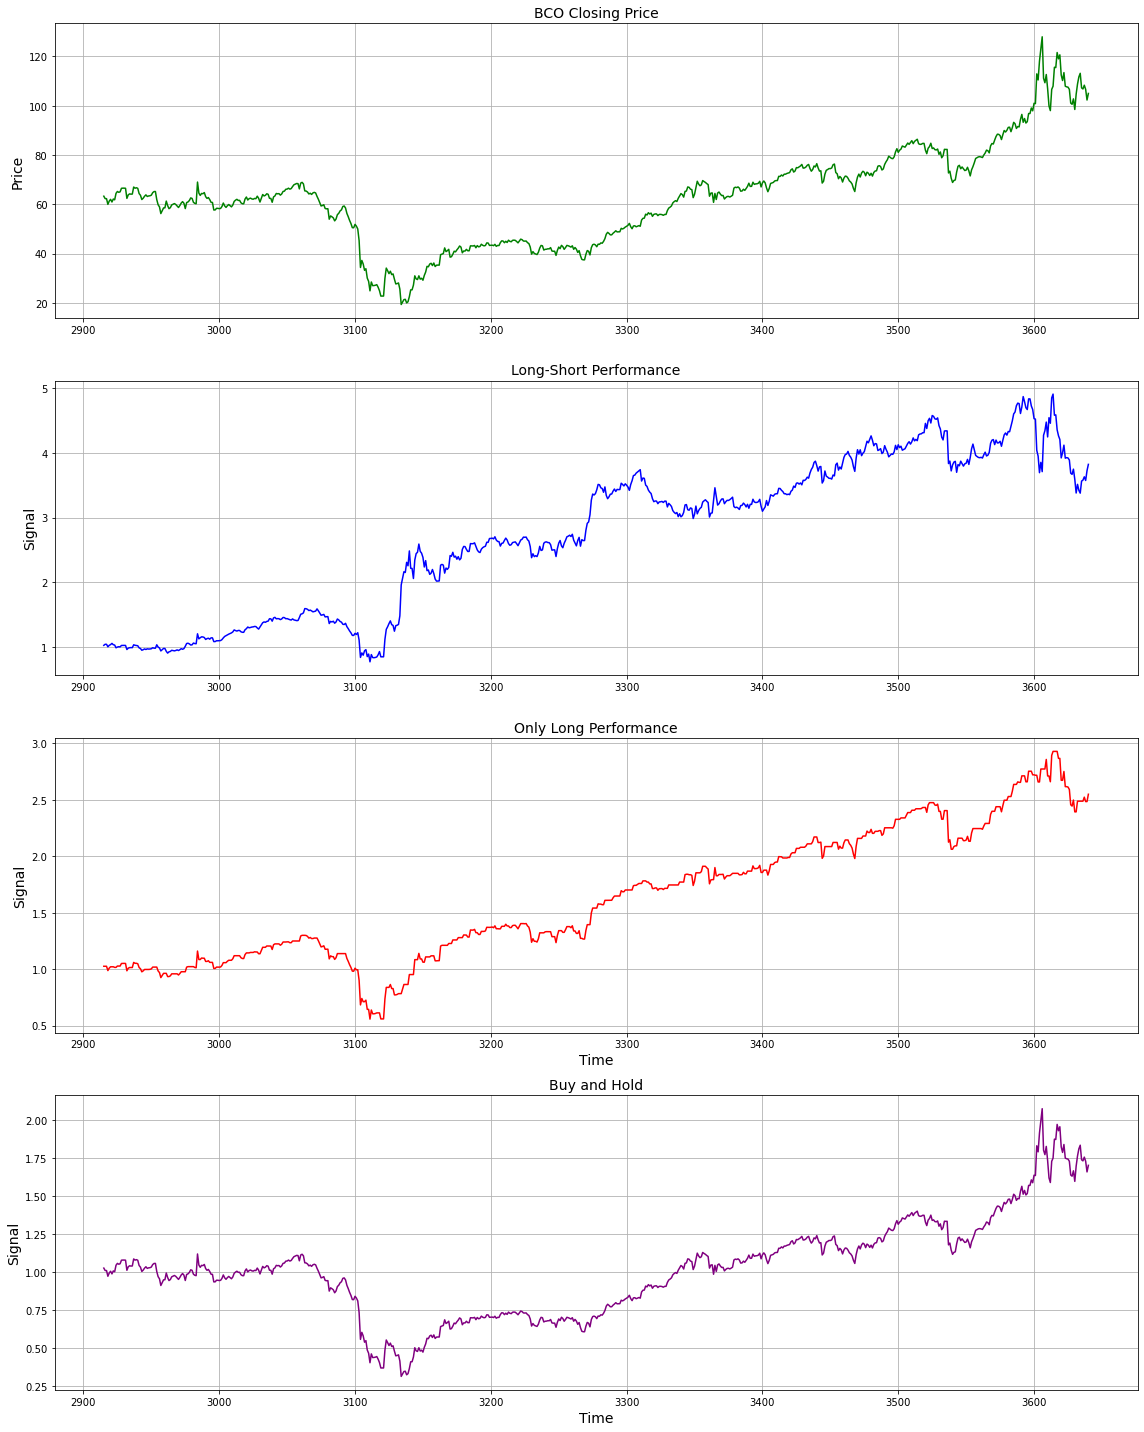

In [59]:
end_len = len(bco["Close"])
start_len = end_len - len(long_short)

#Re-Indexing
index = bco["Close"][start_len:end_len].index

y1 = bco["Close"][start_len:end_len]

y2 = pd.DataFrame(long_short)#long-short
y2.index = index

y3 = pd.DataFrame(only_long) #only long
y3.index = index

y4 = pd.DataFrame(np.exp(perf2).cumprod())
y4.index = index

# Change the figure size
plt.figure(figsize=[16, 20])
x1 =  bco["Close"][start_len:end_len].index
# Plot the subplots
# Plot 1
plt.subplot(4, 1, 1)
plt.plot(y1, color='green')
plt.title('BCO Closing Price', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()

# Plot 2
plt.subplot(4, 1, 2)
plt.plot(y2, color='blue')
plt.title('Long-Short Performance', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.grid()

# Plot 3
plt.subplot(4, 1, 3)
plt.plot(y3 , color='red' )
plt.title('Only Long Performance', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.grid()

# Plot 4
plt.subplot(4, 1, 4)
plt.plot(y4 , color='purple' )
plt.title('Buy and Hold', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.grid()


plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
MDD and MAX.Profti of RF
Strategie      MDD    Max. Profit
-----------  -----  -------------
Only Long    -0.56           0.53
Long Short   -0.33           0.96


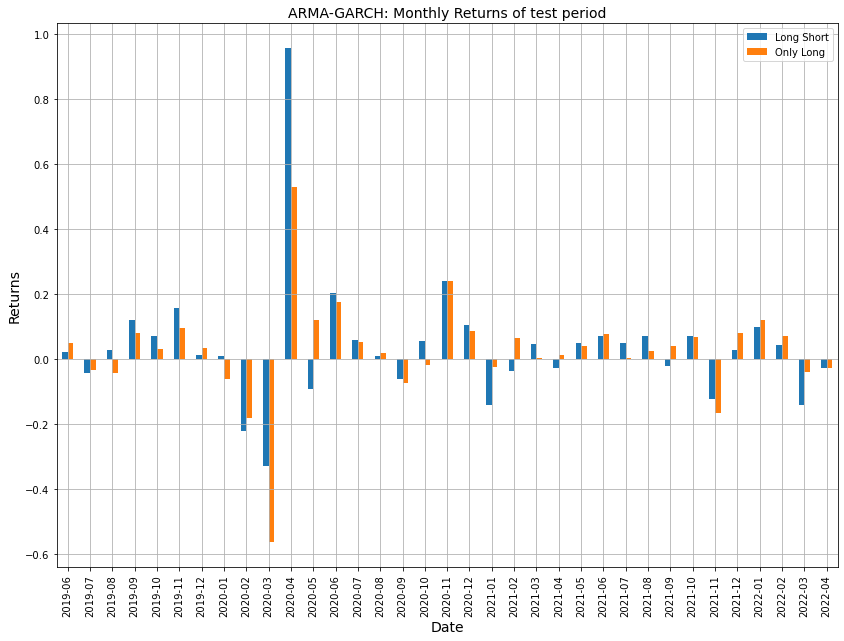

In [60]:
#Indexing
dat = yf.download('BZ=F', start='2007-08-16',end = "2022-04-26",period='1d')
end_len = len(dat["Close"])
long_short = np.exp(perf1).cumprod()
start_len = end_len - len(long_short)
index = dat["Close"][start_len:end_len].index
perf1.index = index
perf.index = index




#Create Monthly Returns Long Short
da = perf1.groupby([(perf1.index.year),(perf1.index.month)]).sum()


monthly_ret_LS = da.values
n = len(monthly_ret_LS)
monthly_ret_LS = pd.DataFrame(monthly_ret_LS,index = pd.date_range(start='6/1/2019', freq='M', periods=n))



#Create Monthly Returns Long
da1 = perf.groupby([(perf.index.year),(perf.index.month)]).sum()
monthly_ret_OL = da1.values
monthly_ret_OL = pd.DataFrame(monthly_ret_OL,index = pd.date_range(start='6/1/2019', freq='M', periods=n))



#Connect DF
mon_ret = pd.concat([monthly_ret_LS, monthly_ret_OL], axis=1)
mon_ret.columns = ["Long Short","Only Long"]



#x Axis
x_ax = pd.period_range('6/1/2019', '2022-04-30', freq='M').strftime('%Y-%m')
mon_ret.index = x_ax




#Plot the barplot



ax = mon_ret.plot.bar(figsize=(14,10), rot = 0)
plt.title("ARMA-GARCH: Monthly Returns of test period",fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Returns', fontsize=14)
plt.legend(loc='best')
plt.grid()





#MDD and Maximum Profit

max_profit_LS = np.max(da)
max_prift_OL = np.max(da1)
MDD_LS = np.min(da)
MDD_OL = np.min(da1)
#create data
data = [["Only Long", round(MDD_OL,2), round(max_prift_OL,2)], 
        ["Long Short", round(MDD_LS,2), round(max_profit_LS,2)]]
  
#define header names
col_names = ["Strategie", "MDD", "Max. Profit"]
  
#display table
print('MDD and MAX.Profti of RF')
print(tabulate(data, headers=col_names))

# Extreme Values

Accuracy Regular Values =  51.3
Accuracy Exrtem Values =  52.78


C:\Users\Danijel\AppData\Local\Temp\ipykernel_28616\3791101417.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_val['Real Signal'] = (reg_val['Log Returns'] > 0).astype(int)
C:\Users\Danijel\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Density Plot of Brent Crude Oil Future Log Returns'}, xlabel='Log_Returns', ylabel='Density'>

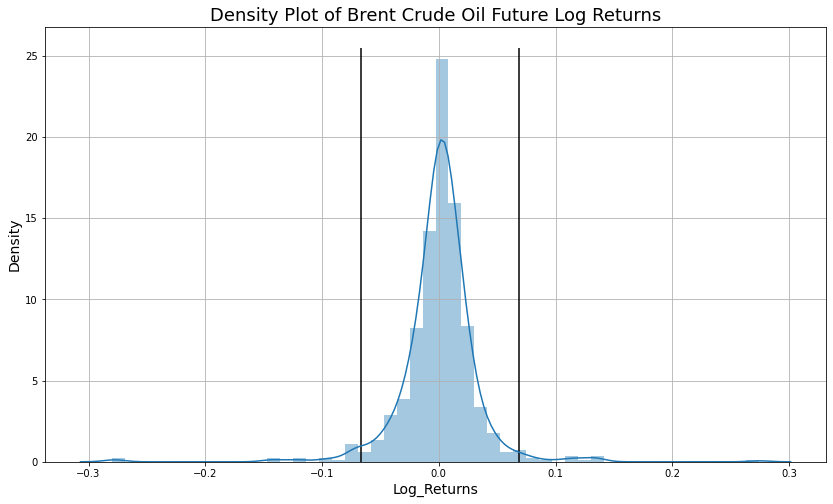

In [61]:
# Creat Data Frame with Predicted Signal and Log Returns
#Only long
y = y_pred_Array_l
n = len(y)
X = bco['Log_Returns'].shift(-1)
X = X[len(X)-n:]
y2 = np.squeeze(y) # Dimension Reduction
d = {'Predicted Signal':y2, 'Log Returns':X}
df = pd.DataFrame(data=d)# Creat the upperbound and the lowerbound
μ = np.mean(X)
σ = np.std(X)
lb = μ-2*σ
ub = μ+2*σ# Creat Data Frame with only Values in the interval [lb,ub]
reg_val = df[(df['Log Returns'] >= lb) & (df['Log Returns'] <= ub)] # DataFrame with Regular Values = [lb,ub]
#print(len(reg_val))# Creat Data Frame with only Values outside the interval [lb,ub]
ext_val = df.drop(index=reg_val.index)
#print(len(ext_val))# Add real Signal with the Log Returns for each Data Frame
reg_val['Real Signal'] = (reg_val['Log Returns'] > 0).astype(int)
ext_val['Real Signal'] = (ext_val['Log Returns'] > 0).astype(int)
#print(reg_val)
#print(ext_val)# Compute accuracy of the Extrem Values and the Regular Values
acc_reg = accuracy_score(reg_val['Real Signal'], reg_val['Predicted Signal'], normalize = True) * 100.0
acc_ext = accuracy_score(ext_val['Real Signal'], ext_val['Predicted Signal'], normalize = True) * 100.0
print('Accuracy Regular Values = ', round(acc_reg,2))
print('Accuracy Exrtem Values = ', round(acc_ext,2))


plt.figure(figsize=(14,8))
plt.title('Density Plot of Brent Crude Oil Future Log Returns', fontsize = 18)
plt.ylabel('Density', fontsize = 14)
plt.xlabel('Log Returns', fontsize = 14)
plt.grid(True)
plt.vlines(x=lb, ymin=0,ymax=25.5, color = 'black')
plt.vlines(x=ub, ymin=0,ymax=25.5, color = 'black')
sns.distplot(X)

